# Exercise 1: Step Cadence
In this exercise, you are given an wrist-worn accelerometer signal of someone who is running. Using your knowledge of signal processing from the last lesson, what you just learned about accelerometers, and the information below, estimate the distance that the wearer ran.

- The step rate is the largest frequency component in the accelerometer signal
- The wearer's average step length is 55 inches

## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Load Data

In [2]:
with np.load('exercise1.npz') as npz:
    fs = npz['fs']    # The sampling rate 
    acc = npz['acc']  # The accelerometer signal

## Estimate Distance Ran

(0, 10)

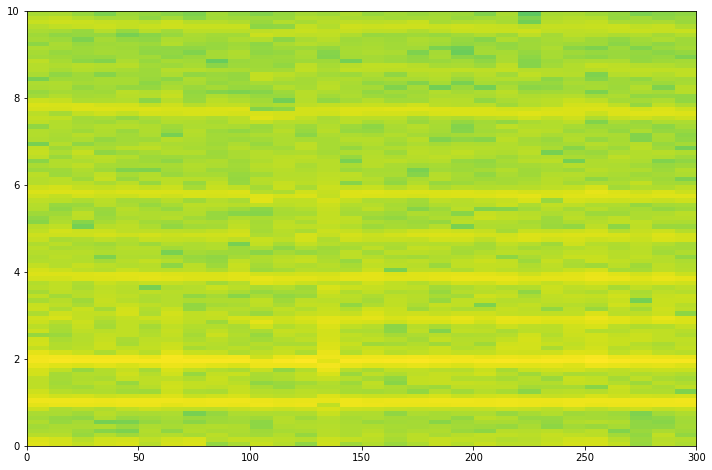

In [3]:
plt.figure(figsize=(12,8))
spec, freqs, _, _ = plt.specgram(acc, NFFT= fs*10, Fs = fs, noverlap=0)
plt.ylim((0, 10))

In [4]:
spec.shape

(1281, 30)

In [5]:
len(freqs)

1281

In [6]:
step_rate = freqs[(np.argmax(spec, axis=0))]

In [7]:
step_rate

array([ 1.9,  1.9,  1.9,  1.9,  1.9,  1.9,  2. ,  1.9,  1.9,  1.9,  1.9,
        1.9,  1.9,  1.8,  1.9,  1.9,  1.9,  1.9,  1.9,  1.9,  1.9,  1.9,
        1.9,  1.9,  1.9,  1.9,  1.9,  1.9,  1.9,  1.9])

In [8]:
step_length = 25
avg_inches_per_second = step_rate * step_length

In [12]:
total_inches_per_window = avg_inches_per_second * 10
total_distance_inches = np.sum(total_inches_per_window)
total_distance_miles = total_distance_inches / 12/ 5280
total_distance_miles

0.22490530303030304

In [13]:
total_time_min = len(acc) / fs / 60
avg_speed = total_time_min / total_distance_miles
avg_speed

22.750315789473682